# Parte teórica

Classifique as afirmações em Verdadeiro ou Falso, justifique as afirmativas falsas

1 - As imagens matricias são mais usadas em logos, pois não apresentam serrilhamento quando são ampliadas

2 - Códigos feitos a mão e no Numpy levam o mesmo tempo para rodar, usamos o Numpy apenas por convêniencia

3 - Um dos usos do histograma é realizar conversões entre os espaços de cores

4 - O código abaixo é usado para importar uma imagem e retirar o terceiro campo de cor (Blue, ou azul, do RGB)

```imagem = np.array(Image.open('Clara.png'))[:, :, :3]```

5 - Utilizamos técnicas como HDR para melhorar a iluminação de imagens

# Parte prática

## Material de apoio

**1 -** Importe as bibliotecas que serão usadas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

**2 -** Abra as imagens techno.jpg, Shrine.jpg e Ninja.jpg, retire o canal alpha se necessário, exiba essas imagens e mostre o formato de cada uma

In [ ]:
ninja = np.array(Image.open('Ninja.jpg'))[:,:,:3]
shrine = np.array(Image.open('Shrine.jpg'))[:,:,:3]
techno = np.array(Image.open('techno.jpg'))[:,:,:3]

plt.figure(figsize=(16,16))
plt.subplot(1, 1, 1)
plt.imshow(ninja)
plt.figure(figsize=(16,16))
plt.subplot(2, 1, 1)
plt.imshow(shrine)
plt.figure(figsize=(16,16))
plt.subplot(3, 1, 1)
plt.imshow(techno)
plt.show()
print(ninja.shape)
print(shrine.shape)
print(techno.shape)

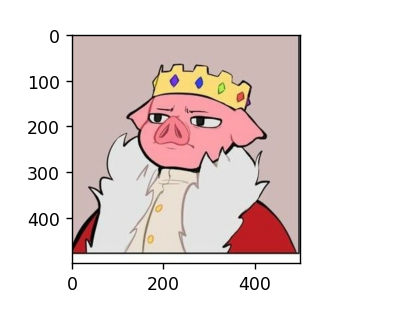
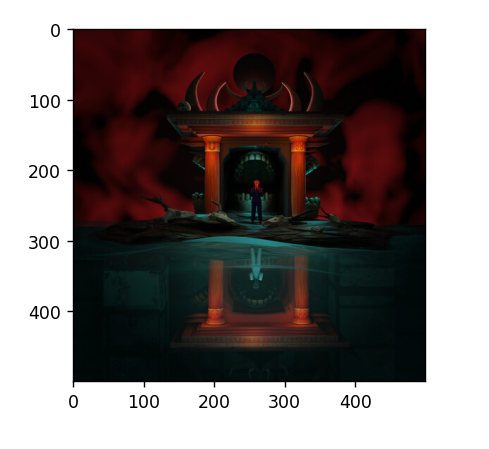
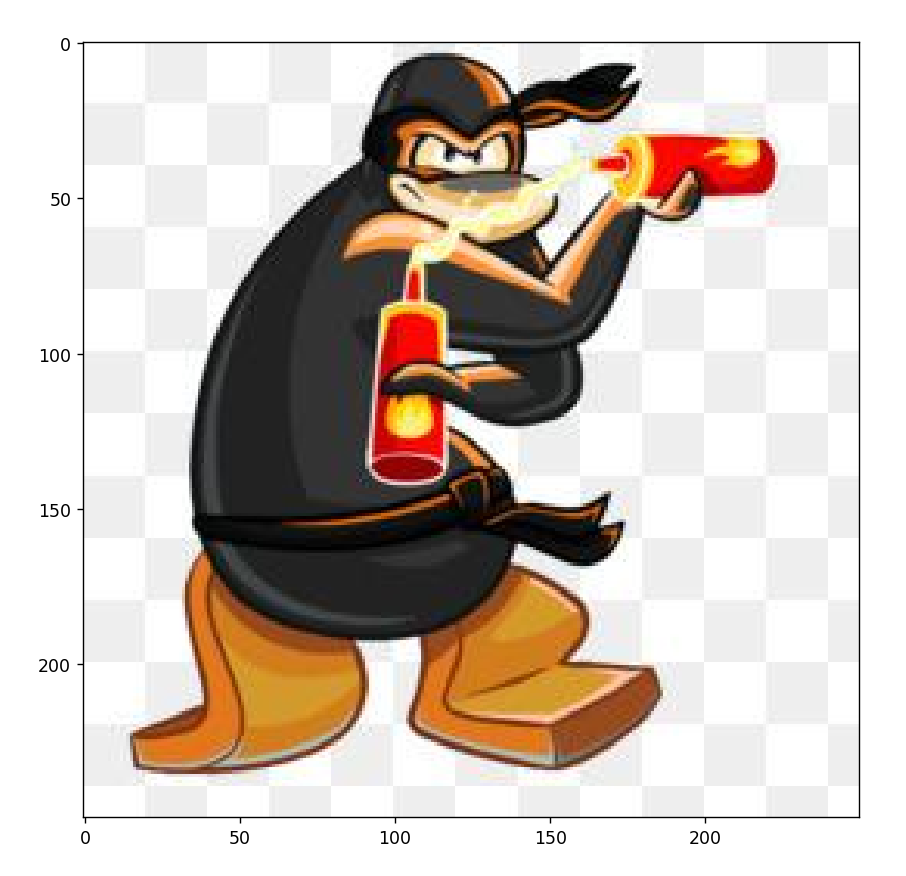

output dos print:
(250, 250, 3)
(500, 500, 3)
(500, 500, 3)

**3 -** Crie uma função que realize o escalonamento de uma imagem para que Ninja e Techno fiquem do mesmo tamanho. Utilize o método de sua preferência e mostre o resultado

In [ ]:
def ninja_to_tecnho(ninja):
    (l , c, p) = ninja.shape
    scale_x, scale_y = 2, 2
    ninja_novo_tamanho = np.zeros(shape=(l * scale_y, c * scale_x, p), dtype=np.uint8)
    for i in range(l):
        for j in range(c):
            new_x = np.round(j * scale_x)
            new_y = np.round(i * scale_y)
            ninja_novo_tamanho[new_y, new_x] = ninja[i, j]

    plt.imshow(ninja_novo_tamanho)
    Image.fromarray(ninja_novo_tamanho).save('ninja_novo_tamanho.png')

ninja_to_tecnho(ninja)

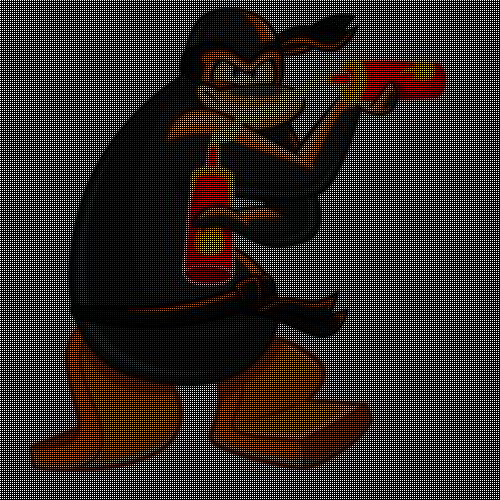

### Importações

```python
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
```

### Manipulação de imagens

```python
img = Image.open('nome.extensão')
img = np.array(Image.open('nome.extensão'))
img = img[:, :, :3]
img_pil = Image.fromarray(img_np)
img.save('nome.png')
Image.fromarray(img).save('nome_arquivo.extensao')
(l,c,p) = img.shape
```

### Greyscale

#### Algoritmo genérico, substituir o método escolhido
```python
img_avg = np.zeros(shape=(l, c), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        r = float(img_np[i, j, 0])
        g = float(img_np[i, j, 1])
        b = float(img_np[i, j, 2])
        
        img_avg[i, j] = (aplicar método)
```

#### Métodos: 


Lightness: $\frac{max(R,G,B)+min(R,G,B)}{2}$


Average: $\frac{R+G+B}{3}$


Luminosity: $0.2126 \cdot R + 0.7152 \cdot G + 0.0722 \cdot B$


RGB para CMY:
### <font color="red">R</font><font color="green">G</font><font color="blue">B</font> para <font color="cyan">C</font><font color="magenta">M</font><font color="yellow">Y</font>
$$\begin{pmatrix}
    C \\ M \\ Y
\end{pmatrix} = \begin{pmatrix}
    1 \\ 1 \\ 1
\end{pmatrix} - \begin{pmatrix}
    R \\ G \\ B
\end{pmatrix} e \begin{pmatrix}
    R \\ G \\ B
\end{pmatrix} = \begin{pmatrix}
    1 \\ 1 \\ 1
\end{pmatrix} - \begin{pmatrix}
    C \\ M \\ Y
\end{pmatrix}$$
* **<font color="red">R</font>** + **<font color="cyan">C</font>** = 1 (ou 255);
* **<font color="green">G</font>** + **<font color="magenta">M</font>** = 1;
* **<font color="blue">B</font>** + **<font color="yellow">Y</font>** = 1.


Interpolação Bilinear:
Seja $I$ a imagem de entrada $L_{entrada}×C_{entrada}$ e $J$ a imagem de saída $L_{saída}×C_{saída}.$

Seja $s_L = L_{entrada}/L_{saída}$ e $s_C = C_{entrada}/C_{saída}.$

Seja $l_f = l \cdot s_L$ para $r=0,\ldots,R_{saída}-1$ e $c_f = c \cdot s_C$ para $c=0,\ldots,C_{saída}-1.$

Seja $r_0 = \lfloor{l_f}\rfloor$ e $c=\lfloor{c_f}\rfloor.$

Seja $\Delta_l = l_f - l_0$ e $\Delta_c = c_f - c_0.$

Então $J(l, c)$
$$=I(l_0, c_0) \cdot (1-\Delta_l) \cdot (1-\Delta_c)$$
$$+I(l_0+1, c_0) \cdot \Delta_l \cdot (1-\Delta_c)$$
$$+I(l_0, c_0+1) \cdot (1-\Delta_l) \cdot \Delta_c$$
$$+I(l_0+1, c_0+1) \cdot \Delta_l \cdot \Delta_c.$$

### Escalonamento com nearest neighbor

```python
ls, cs = l * sy, c * sx
mario_nn = np.zeros(shape=(ls, cs, p), dtype=np.uint8)

for i in range(ls):
    for j in range(cs):
        new_y = int(np.floor(i * (l / ls)))
        new_x = int(np.floor(j * (c / cs)))
        
        mario_nn[i, j] = mario[new_y, new_x]
```
### Escalonamento clássico
```python
scale_x, scale_y = 2, 2
mario_scale = np.zeros(shape=(l * scale_y, c * scale_x, p), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = np.round(j * scale_x)
        new_y = np.round(i * scale_y)
        mario_scale[new_y, new_x] = mario[i, j]

plt.imshow(mario_scale)
Image.fromarray(mario_scale).save('mario_scale.png')
```

### Cisalhamento

```python
img_shear = np.zeros((int(l * (1.1 + cy)), int(c * (1.1 + cx)), p), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = int(j + cx * i)
        new_y = int(cy * j + i)
        
        img_shear[new_y, new_x] = img[i, j]
```

### Imagem grayscale para imagem binária de 3 canais

```python
bin = np.zeros(shape=(l,c,3),dtype=np.uint8)
    
for i in range(l):
    for j in range(c):
        if img[i,j] > thresh: 
            bin[i,j,:] = 255 
        else: 
            bin[i,j,:] = 0

```
### Blending com escala genérica

```python
imagem_blending = (C * img_1) + ((1 - C) * img_2)
imagem_blending = imagem_blending.astype(np.uint8)
```

### Histograma
```python
def histogram_gray(img):
    (l, c) = img.shape
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            intensity = img[i, j]
            histogram[intensity] += 1
            
    return histogram

def show_histogram_gray(img):
    histogram = histogram_gray(img)
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram)

def show_histogram(img):
    histogram_r = histogram_gray(img[:, :, 0])
    histogram_g = histogram_gray(img[:, :, 1])
    histogram_b = histogram_gray(img[:, :, 2])
    
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram_r, color='red')
    plt.bar(range(256), histogram_g, color='green')
    plt.bar(range(256), histogram_b, color='blue')

```
### Espelhamento
```python
refl = np.zeros(shape=example.shape, dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = -j
        new_y = i
        refl[new_y, new_x] = example[i, j]

plt.imshow(refl)
```


No outro eixo

```python
refl = np.zeros(shape=example.shape, dtype=np.uint8)
refl[::-1, ::1] = example
plt.imshow(refl)
```

**4 -** Apresente o Histograma da imagem Shrine. Mostre o resultado

In [ ]:
def histogram_gray(img):
    (l, c) = img.shape
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            intensity = img[i, j]
            histogram[intensity] += 1
            
    return histogram

def show_histogram_gray(img):
    histogram = histogram_gray(img)
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram)

def show_histogram(img):
    histogram_r = histogram_gray(img[:, :, 0])
    histogram_g = histogram_gray(img[:, :, 1])
    histogram_b = histogram_gray(img[:, :, 2])
    
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram_r, color='red')
    plt.bar(range(256), histogram_g, color='green')
    plt.bar(range(256), histogram_b, color='blue')
    plt.show()


show_histogram(shrine)

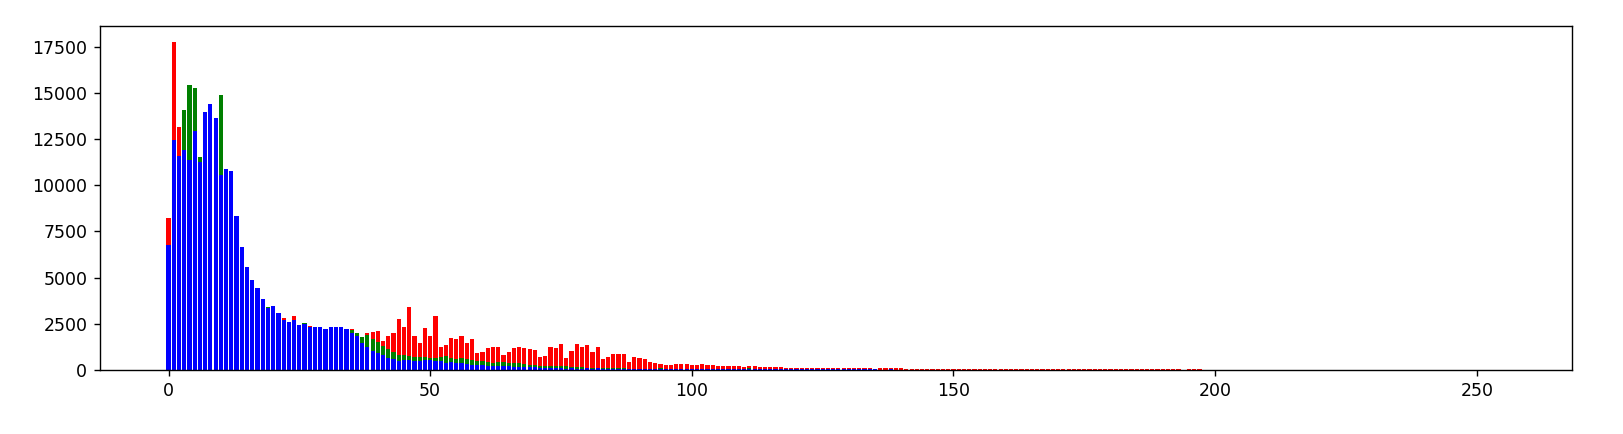

**5 -** Aplique o espelhamento no eixo X à imagem techno. Mostre o resultado

In [ ]:
(l, c, p) = techno.shape
refl = np.zeros(shape=techno.shape, dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = -j
        new_y = i
        refl[new_y, new_x] = techno[i, j]

plt.imshow(refl)
plt.show()

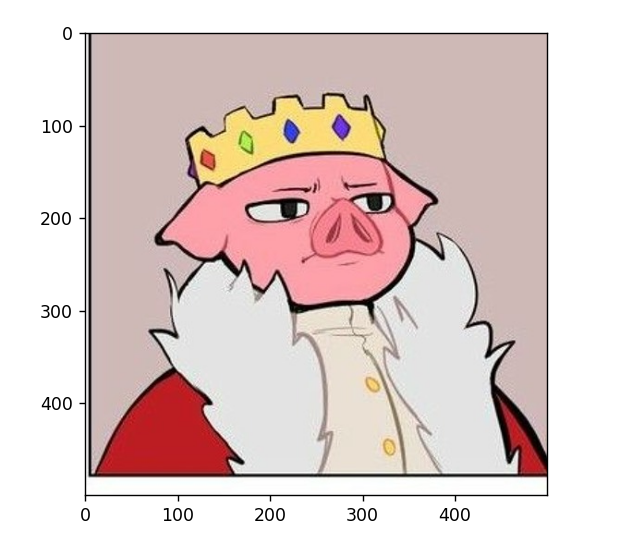

**6 -** Realize a operação lógica *blending* entre a imagem gerada na Questão 3 e gerada na Questão 5, ambas devem ter o mesmo grau de influência. Depois, aplique o *Blending* entre o resultado e a imagem Shrine. Shrine deve ter uma influência maior. Mostre o resultado

In [ ]:
ninja_blending = np.array(Image.open('ninja_novo_tamanho.png'))[:,:,:3]
imagem_blending = (0.5 * ninja_blending) + ((1 - 0.5) * refl) #mesmo grau de influencia
imagem_blending = imagem_blending.astype(np.uint8)
plt.imshow(imagem_blending)
plt.show()

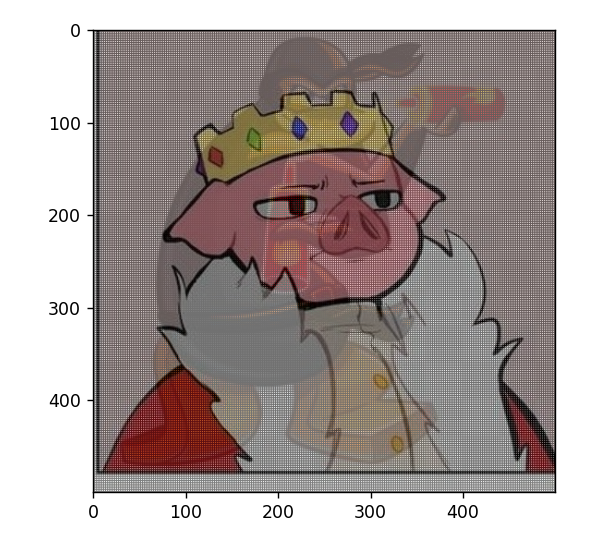

In [ ]:
imagem_blending2 = np.array(imagem_blending)[:,:,:3]
imagem_blending2 = (0.2 * imagem_blending) + ((1 - 0.2) * shrine) #shrine tem uma influencia maior
imagem_blending2 = imagem_blending2.astype(np.uint8)
plt.imshow(imagem_blending2)
plt.show()

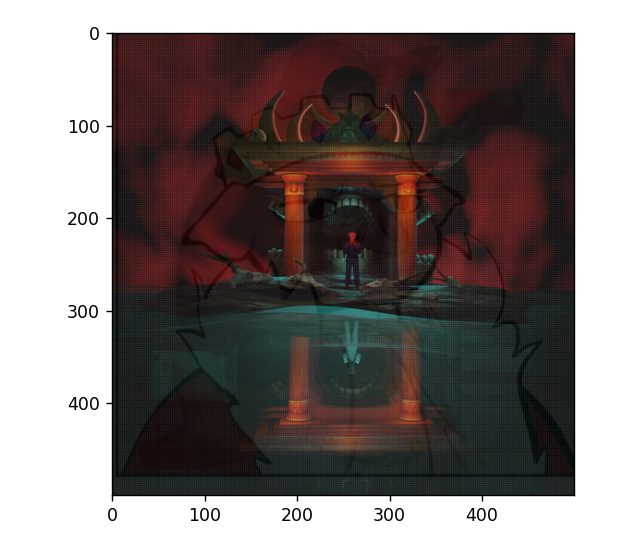

**7 -** Crie uma função para transformar imagem RGB em CMY

In [ ]:
def rgb_to_cmy(img_np):
    
    img_avg = np.zeros(shape=(l, c), dtype=np.uint8)
    for i in range(l):
        for j in range(c):
            r = float(img_np[i, j, 0])
            g = float(img_np[i, j, 1])
            b = float(img_np[i, j, 2])
            
            img_avg[i, j] = (1 - r)+  (1-g)+ (1-b)
    plt.imshow(img_avg)
    plt.show()

rgb_to_cmy(shrine)


**8 -** Aplique a imagem da **questão 6 à função feita na questão 7**. Mostre o resultado

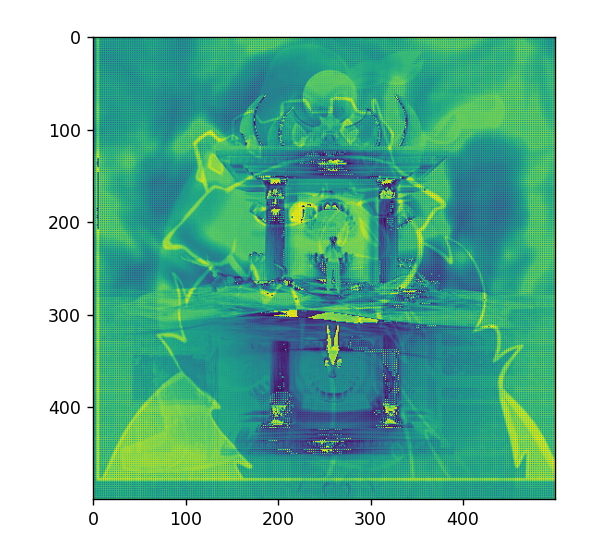

In [ ]:
rgb_to_cmy(imagem_blending2)


**9 -** Salve a imagem da questão anterior no disco com o nome "resultado.jpg"

In [ ]:
def rgb_to_cmy(img_np):
    
    img_avg = np.zeros(shape=(l, c), dtype=np.uint8)
    for i in range(l):
        for j in range(c):
            r = float(img_np[i, j, 0])
            g = float(img_np[i, j, 1])
            b = float(img_np[i, j, 2])
            
            img_avg[i, j] = (1 - r)+  (1-g)+ (1-b)
    

    Image.fromarray(img_avg).save('resultado.jpg') #estou salvando aqui
    plt.imshow(img_avg)
    plt.show()

rgb_to_cmy(imagem_blending2)

# Lembre de entregar tudo como um arquivo ZIP, com o arquivo resultado e seu notebook